In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
data.shape

(1436, 38)

In [4]:
df = pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
df.count()

Price            1436
Age_08_04        1436
KM               1436
HP               1436
cc               1436
Doors            1436
Gears            1436
Quarterly_Tax    1436
Weight           1436
dtype: int64

In [6]:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
df.drop(df.duplicated().sum())

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
df =df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [11]:
df.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [12]:
dis_feature=[feature for feature in df.columns if len(df[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(dis_feature)))

Discrete Variables Count: 5


In [13]:
cont_feature = [feature for feature in df.columns if df[feature].dtype!='O' and feature not in dis_feature]
print('Continuous Feature Count {}'.format(len(cont_feature)))

Continuous Feature Count 4


In [14]:
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

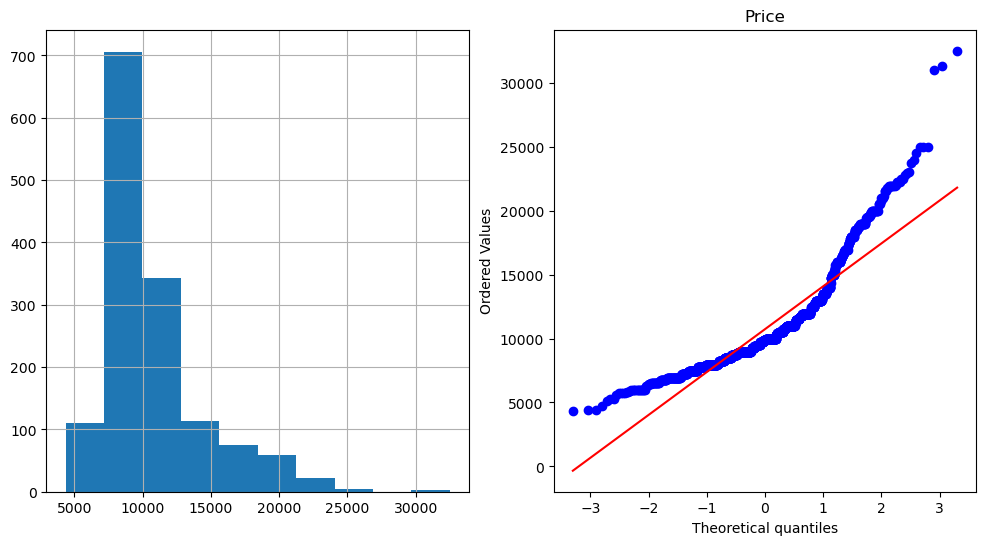

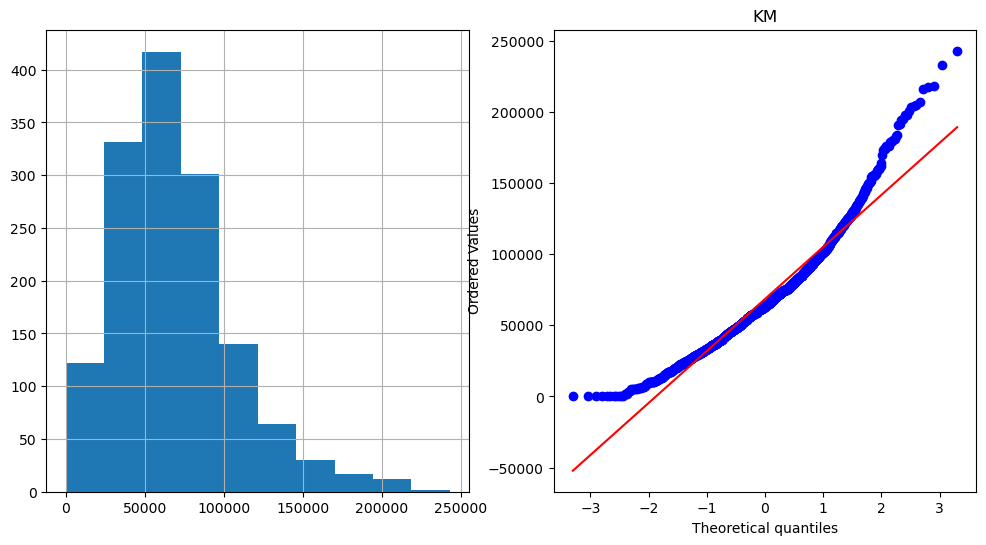

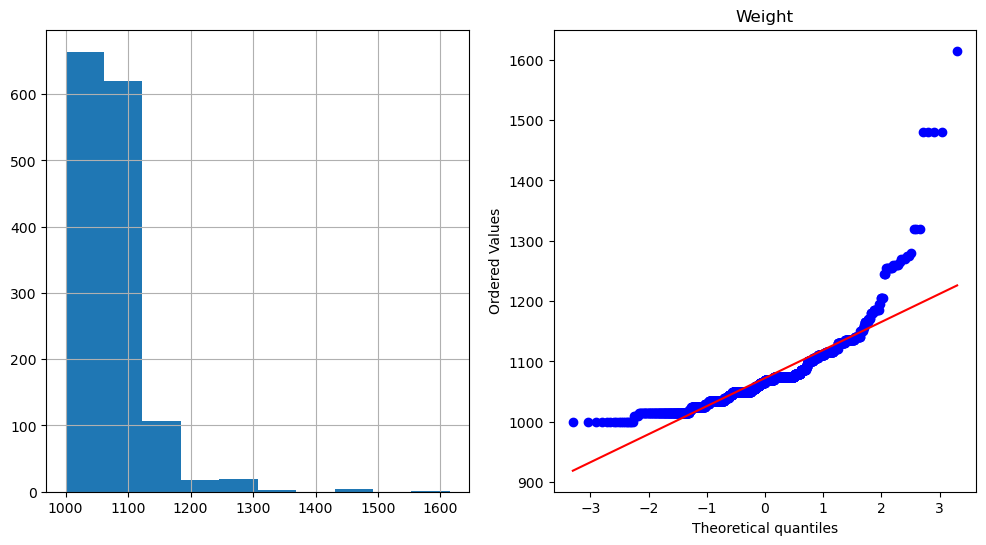

In [15]:
plot_data(df,'Price')
plt.title('Price')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

In [16]:
df = df.copy()

In [17]:
dfl = np.log(df[cont_feature])

Text(0.5, 1.0, 'Weight')

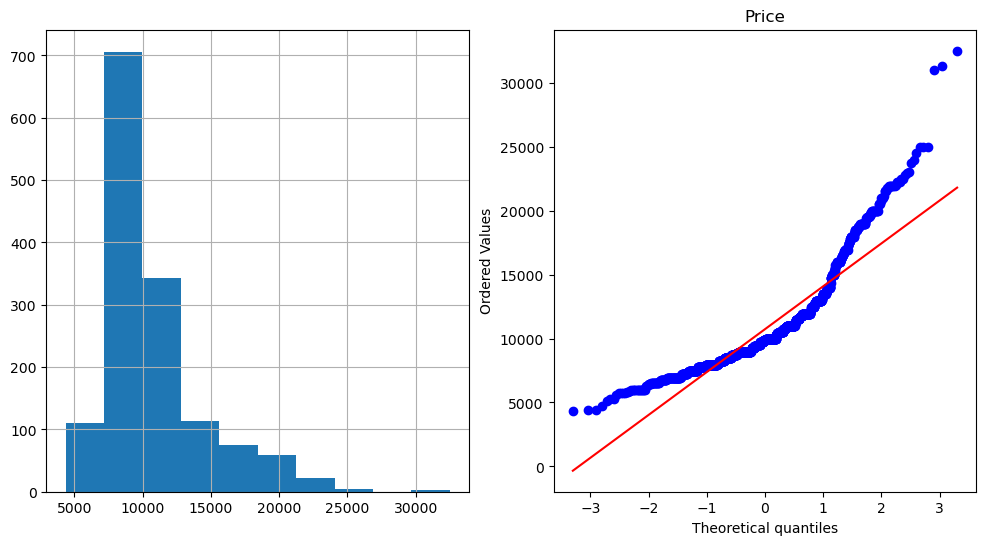

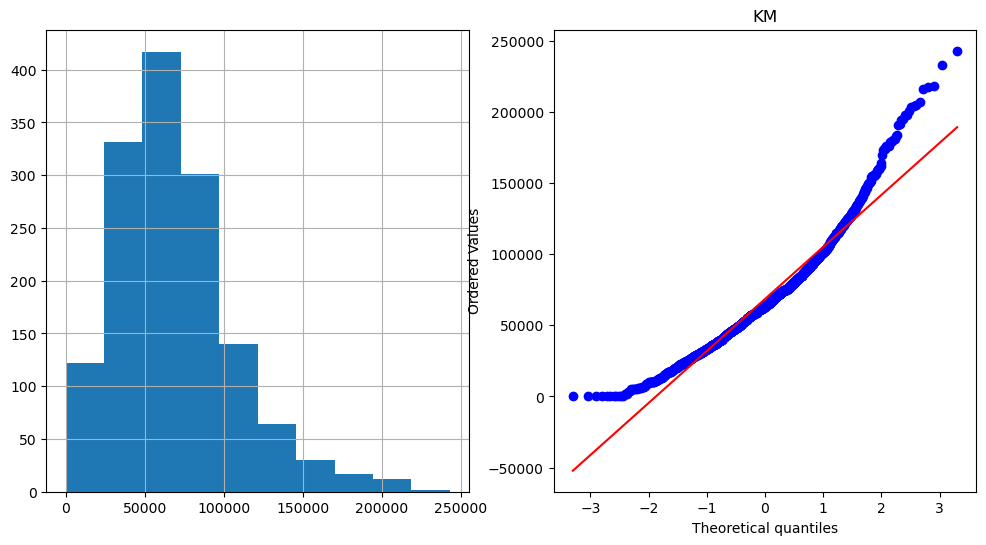

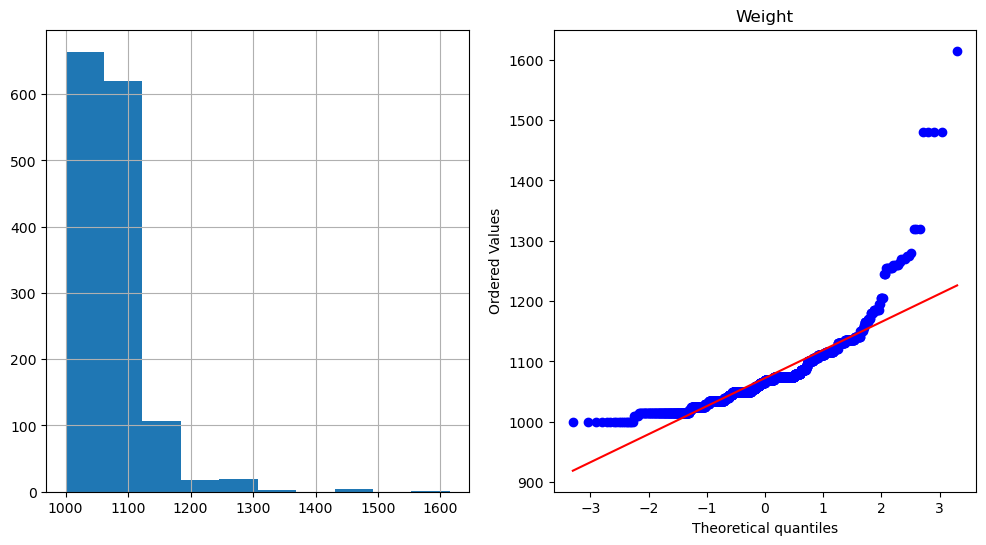

In [18]:
plot_data(df,'Price')
plt.title('Price')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

In [19]:
dfsq=np.sqrt(df[cont_feature])

Text(0.5, 1.0, 'Weight')

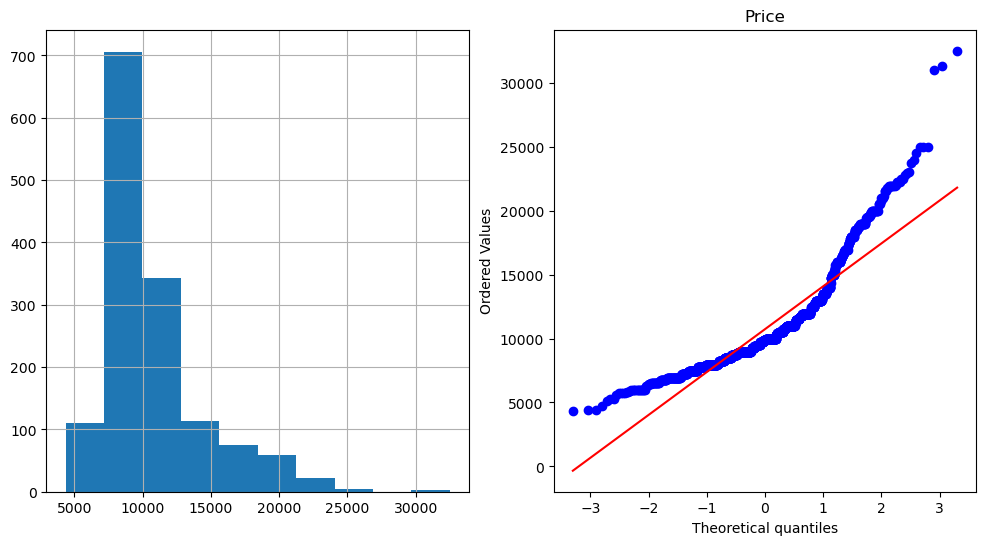

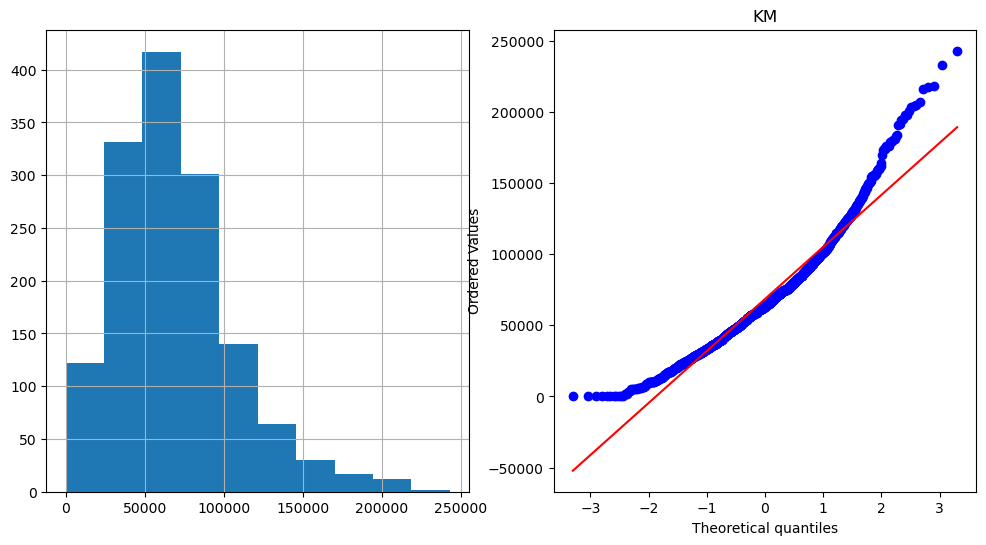

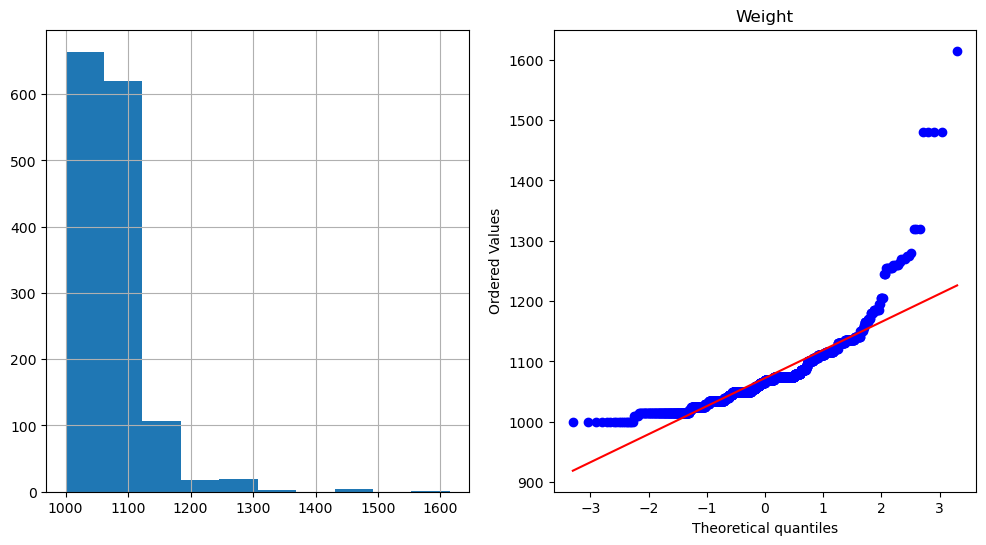

In [20]:
plot_data(df,'Price')
plt.title('Price')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

In [21]:
dfcb = np.cbrt(df[cont_feature])

Text(0.5, 1.0, 'Weight')

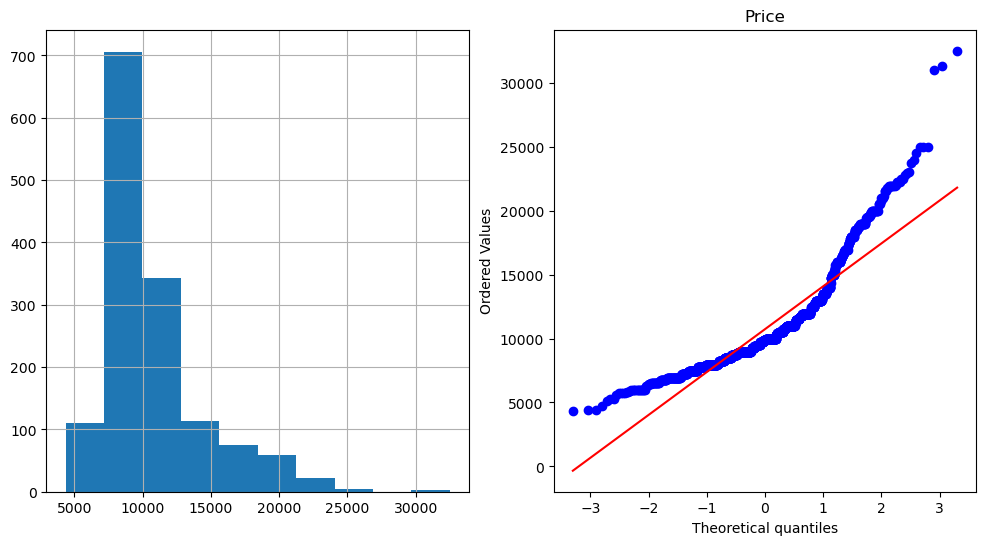

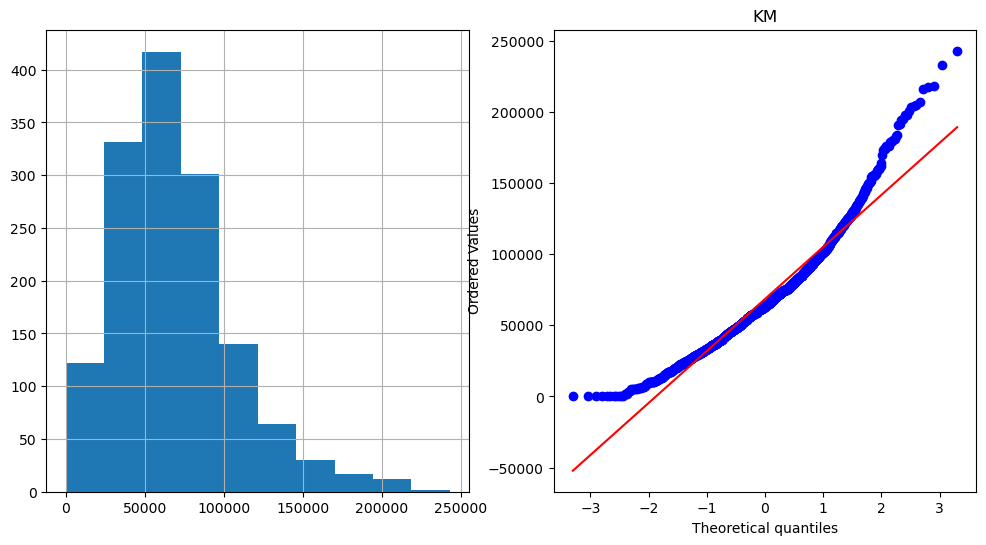

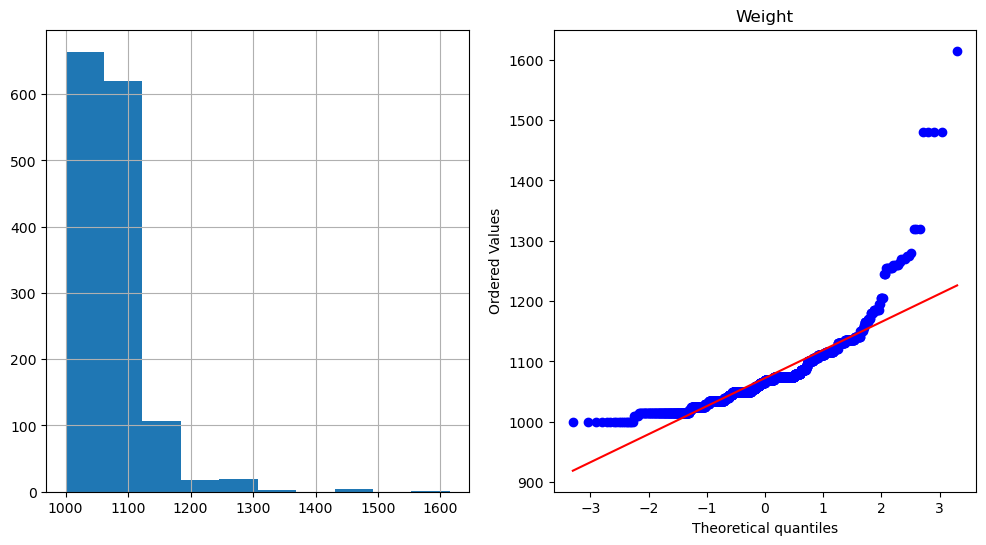

In [22]:
plot_data(df,'Price')
plt.title('Price')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

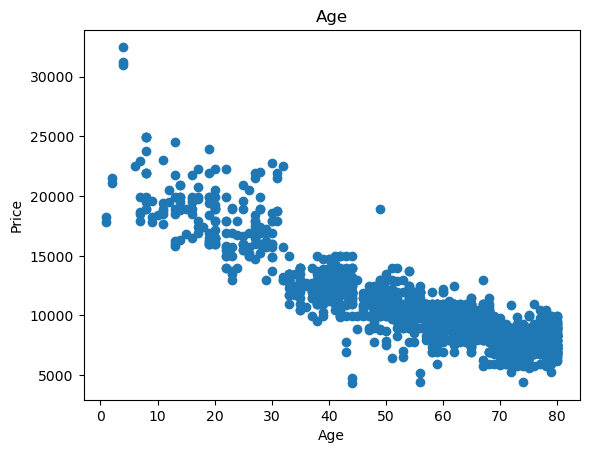

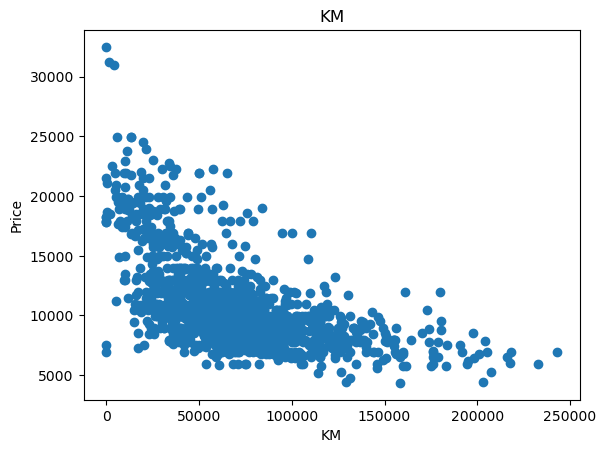

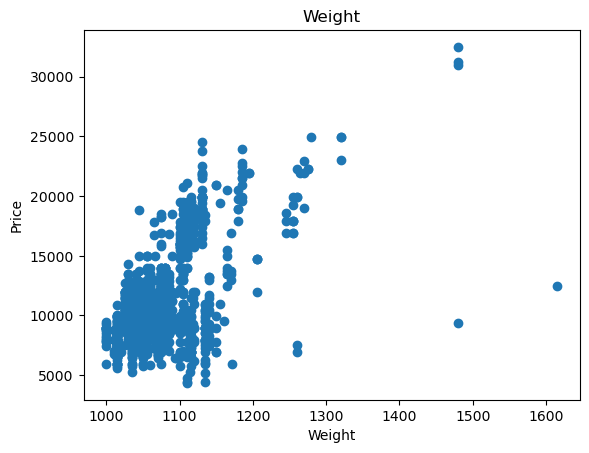

In [23]:
for feature in cont_feature:
    if feature!="Price":         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

In [24]:
x = df.drop(['Price'],axis = 1)

In [25]:
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_train, y_pred_train)
print('Mean square error:',mse1)
print("Root Mean squarred error: ",np.sqrt(mse1).round(2))

Mean square error: 1647731.954209296
Root Mean squarred error:  1283.64


In [30]:
mse2 = mean_squared_error(y_test, y_pred_test)
print('Mean square error:',mse2)
print("Root Mean squarred error: ",np.sqrt(mse2).round(2))

Mean square error: 2228243.7399240304
Root Mean squarred error:  1492.73


In [31]:
from sklearn.metrics import r2_score
RS1 = r2_score(y_train, y_pred_train )
RS2 = r2_score(y_test, y_pred_test )
print(RS1)
print(RS2)

0.8663036510298301
0.851749130434525


In [32]:
x2 = dfcb[['Age','KM']]

In [33]:
y2 = dfcb['Price']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 45)

In [35]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:17   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
Age         -154.1492      2.736    -56.334      0.000    -159.517    -148.782
KM            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
x3 = df[['Age','KM','HP']]

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3, y2, test_size = 0.3, random_state = 45)

In [38]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2039.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:19   Log-Likelihood:                -12613.
No. Observations:                1436   AIC:                         2.523e+04
Df Residuals:                    1432   BIC:                         2.526e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.645e+04    351.717     46.771      0.000    1.58e+04    1.71e+04
Age         -154.6263      2.602    -59.432      0.000    -159.730    -149.523
KM            -0.0115      0.001     -8.480      0.000      -0.014      -0.009
HP            36.6205      2.956     12.388      0.000      30.822      42.419
==============================================================================
Omnibus:                      417.364   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.238
Skew:                           1.157   Prob(JB):                         0.00
Kurtosis:                       9.693   Cond. No.                     6.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
x4 = df[['Age','KM','HP','CC']]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x4, y2, test_size = 0.3, random_state = 45)

In [41]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+CC',data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1561.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:20   Log-Likelihood:                -12601.
No. Observations:                1436   AIC:                         2.521e+04
Df Residuals:                    1431   BIC:                         2.524e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.575e+04    376.629     41.805      0.000     1.5e+04    1.65e+04
Age         -152.3291      2.622    -58.105      0.000    -157.472    -147.186
KM            -0.0128      0.001     -9.345      0.000      -0.015      -0.010
HP            35.4729      2.941     12.061      0.000      29.704      41.242
CC             0.4963      0.100      4.967      0.000       0.300       0.692
==============================================================================
Omnibus:                      399.614   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2873.899
Skew:                           1.099   Prob(JB):                         0.00
Kurtosis:                       9.573   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
x5 = df[['Age','KM','HP','CC','Doors']]

In [43]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+CC+Doors',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1266.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:21   Log-Likelihood:                -12592.
No. Observations:                1436   AIC:                         2.520e+04
Df Residuals:                    1430   BIC:                         2.523e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.508e+04    406.994     37.055      0.000    1.43e+04    1.59e+04
Age         -150.7765      2.633    -57.259      0.000    -155.942    -145.611
KM            -0.0131      0.001     -9.627      0.000      -0.016      -0.010
HP            34.4423      2.935     11.736      0.000      28.685      40.199
CC             0.4744      0.099      4.769      0.000       0.279       0.670
Doors        183.2118     43.977      4.166      0.000      96.946     269.477
==============================================================================
Omnibus:                      395.536   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2880.102
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       9.592   Cond. No.                     7.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
x6 = df[['Age','KM','HP','CC','Gears']]

In [45]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+CC+Gears',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:22   Log-Likelihood:                -12597.
No. Observations:                1436   AIC:                         2.521e+04
Df Residuals:                    1430   BIC:                         2.524e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.294e+04   1122.544     11.532      0.000    1.07e+04    1.51e+04
Age         -152.1912      2.617    -58.163      0.000    -157.324    -147.058
KM            -0.0131      0.001     -9.564      0.000      -0.016      -0.010
HP            33.6562      3.014     11.167      0.000      27.744      39.569
CC             0.4983      0.100      4.997      0.000       0.303       0.694
Gears        596.0142    225.152      2.647      0.008     154.350    1037.678
==============================================================================
Omnibus:                      407.640   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2988.726
Skew:                           1.119   Prob(JB):                         0.00
Kurtosis:                       9.704   Cond. No.                     2.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
x7 = df[['Age','KM','HP','Doors']]

In [47]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+Doors',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1554.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:22   Log-Likelihood:                -12604.
No. Observations:                1436   AIC:                         2.522e+04
Df Residuals:                    1431   BIC:                         2.524e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.571e+04    387.712     40.528      0.000     1.5e+04    1.65e+04
Age         -152.8726      2.616    -58.439      0.000    -158.004    -147.741
KM            -0.0119      0.001     -8.820      0.000      -0.015      -0.009
HP            35.4741      2.949     12.029      0.000      29.689      41.259
Doors        194.2729     44.248      4.391      0.000     107.476     281.070
==============================================================================
Omnibus:                      412.184   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3001.517
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                       9.708   Cond. No.                     7.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
x8 = df[['Age','KM','HP','Doors','Gears']]

In [49]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+Doors+Gears',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:23   Log-Likelihood:                -12597.
No. Observations:                1436   AIC:                         2.521e+04
Df Residuals:                    1430   BIC:                         2.524e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.182e+04   1173.900     10.070      0.000    9518.979    1.41e+04
Age         -152.4287      2.609    -58.430      0.000    -157.546    -147.311
KM            -0.0124      0.001     -9.173      0.000      -0.015      -0.010
HP            32.8501      3.031     10.838      0.000      26.905      38.796
Doors        224.1765     44.889      4.994      0.000     136.120     312.233
Gears        804.9896    229.315      3.510      0.000     355.160    1254.820
==============================================================================
Omnibus:                      421.849   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3170.219
Skew:                           1.158   Prob(JB):                         0.00
Kurtosis:                       9.901   Cond. No.                     2.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
x9 = df[['Age','KM','HP','Doors','Gears','QT','CC']]

In [51]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+Doors+Gears+QT+CC',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1069.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:23   Log-Likelihood:                -12492.
No. Observations:                1436   AIC:                         2.500e+04
Df Residuals:                    1428   BIC:                         2.504e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9980.6587   1101.951      9.057      0.000    7819.042    1.21e+04
Age         -136.3855      2.652    -51.426      0.000    -141.588    -131.183
KM            -0.0201      0.001    -14.793      0.000      -0.023      -0.017
HP            43.5743      2.946     14.790      0.000      37.795      49.354
Doors        157.9483     41.991      3.762      0.000      75.578     240.318
Gears        620.1432    213.676      2.902      0.004     200.990    1039.296
QT            16.1981      1.148     14.108      0.000      13.946      18.450
CC             0.1066      0.096      1.106      0.269      -0.083       0.296
==============================================================================
Omnibus:                      211.411   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.784
Skew:                           0.690   Prob(JB):                    5.15e-167
Kurtosis:                       6.301   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
x9 = df[['Age','KM','HP','Doors','Gears','QT','Weight']]

In [53]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1291.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:48:24   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5477.5069   1409.995     -3.885      0.000   -8243.391   -2711.623
Age         -121.7000      2.616    -46.518      0.000    -126.832    -116.568
KM            -0.0209      0.001    -16.756      0.000      -0.023      -0.018
HP            31.3306      2.807     11.161      0.000      25.824      36.837
Doors         -0.7545     40.012     -0.019      0.985     -79.243      77.734
Gears        598.2602    197.089      3.035      0.002     211.645     984.875
QT             3.7352      1.301      2.872      0.004       1.184       6.287
Weight        16.7301      1.055     15.864      0.000      14.661      18.799
==============================================================================
Omnibus:                      148.064   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.063
Skew:                          -0.208   Prob(JB):                    6.13e-211
Kurtosis:                       7.001   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)
print(vif_age)

1.8846198056602868


In [55]:
rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)
print(vif_KM)

1.7569047782042881


In [56]:
rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_HP=1/(1-rsq_HP)
print(vif_HP)

1.4194221086310974


In [57]:
rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_CC=1/(1-rsq_CC)
print(vif_CC)

1.1638939849423795


In [58]:
rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df).fit().rsquared
vif_DR=1/(1-rsq_DR)
print(vif_DR)

1.156575207076043


In [59]:
rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df).fit().rsquared
vif_GR=1/(1-rsq_GR)
print(vif_GR)

1.098723019347037


In [60]:
rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df).fit().rsquared
vif_QT=1/(1-rsq_QT)
print(vif_QT)

2.311430811531038


In [61]:
rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df).fit().rsquared
vif_WT=1/(1-rsq_WT)
print(vif_WT)

2.5164198374458695


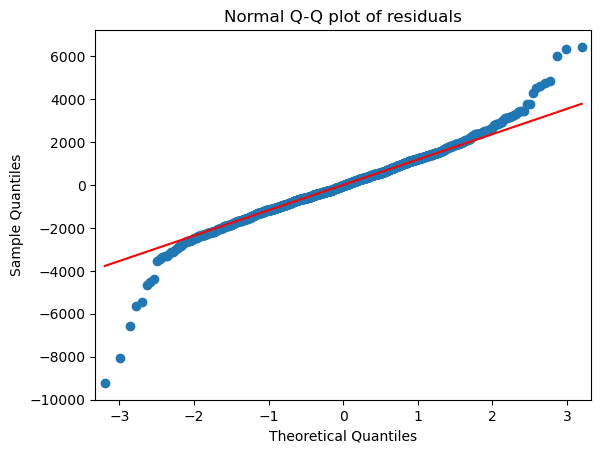

In [62]:
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [63]:
list(np.where(model.resid>6000))

[array([109, 147, 523], dtype=int64)]

In [64]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [65]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

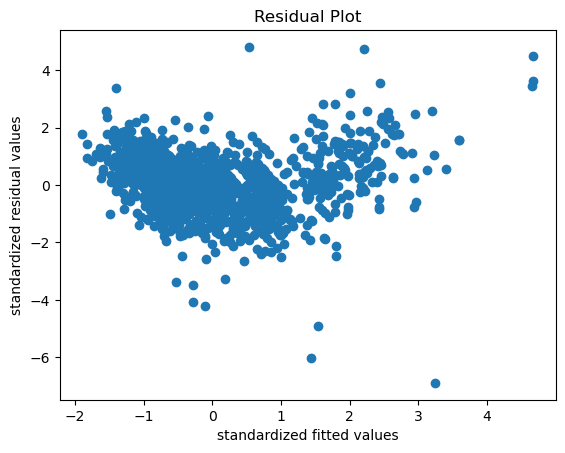

In [66]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [67]:
(c,_)=model.get_influence().cooks_distance
c

array([8.16137133e-03, 4.48027088e-03, 6.16998328e-03, ...,
       1.23719410e-06, 7.75468193e-04, 1.22601106e-02])

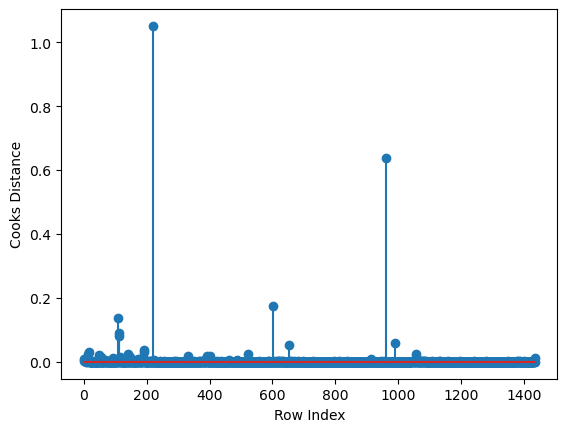

In [68]:
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [69]:
df=df.drop(df.index[[80]],axis=0).reset_index(drop=True)
df

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [70]:
while model.rsquared < 0.91:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()
        (c,_)=model.get_influence().cooks_distance
        df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()
        final_model.rsquared , final_model.aic

In [71]:
final_model.rsquared

0.9107163056494366